observation to be given to stackholder

##Life cycle of Machinelearning Project
-1.Understnd the problem statement

2.Data collection 

3.Data checks to perform

4.Exploratory data analysis

5.Data Pre-Processing

6.Model Training.

7.Choose best model

1.Problem Statemnt

this project understands how student performance (test scores) is affected by other variables such as Gender
Ethnicitymparental level of education ,lunch and test preparation course

import Library

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Data checks to perform

Check Missing values  
check Duplicates  
check data types  
check the number of uniques values of each columns  
check statistics of dataset  
check various categories present in different categories  

Check Missing values

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

check duplicates

In [8]:
df.duplicated().sum()

0

no duplicates

In [10]:
##check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of uniques values of each columns

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
##check statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights  
-from above description of numerical data - all means are very close to each other -btw -66 and 68  
-all standard deviations are also close - btwn 14-15
-while there is a minimum score 0 for math for writing minmum is much higher =10 and for reading hiher =17

Exploring Data

In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [20]:
print("categories in gender variables: ",end=" " )
print(df['gender'].unique())


print("categories in race variables: ",end=" " )
print(df['race_ethnicity'].unique())


print("categories in parental level of education variables: ",end=" " )
print(df['parental_level_of_education'].unique())


print("categories in lunch variables: ",end=" " )
print(df['lunch'].unique())

print("categories in test preparatiion course variables: ",end=" " )
print(df['test_preparation_course'].unique())


categories in gender variables:  ['female' 'male']
categories in race variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variables:  ['standard' 'free/reduced']
categories in test preparatiion course variables:  ['none' 'completed']


In [21]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
category_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [22]:
print('we have {} numeric features : {} '.format(len(numeric_feature),numeric_feature))
print('we have {} numeric features : {} '.format(len(category_feature),category_feature))

we have 3 numeric features : ['math_score', 'reading_score', 'writing_score'] 
we have 5 numeric features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [23]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Addin columns for Total score and average score

In [24]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
df['reading_score'].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [33]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in Reading: 17


In [35]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less marks in maths: {math_less_20}')
print(f'Number of students with less marks in writing: {writing_less_20}')
print(f'Number of students with less marks in Reading: {reading_less_20}')


Number of students with less marks in maths: 4
Number of students with less marks in writing: 3
Number of students with less marks in Reading: 1


Exploring Data(Visualization)

Visualize average score distribution to make conclusion

Histogram  
kernel Dustribution function (KDE)  

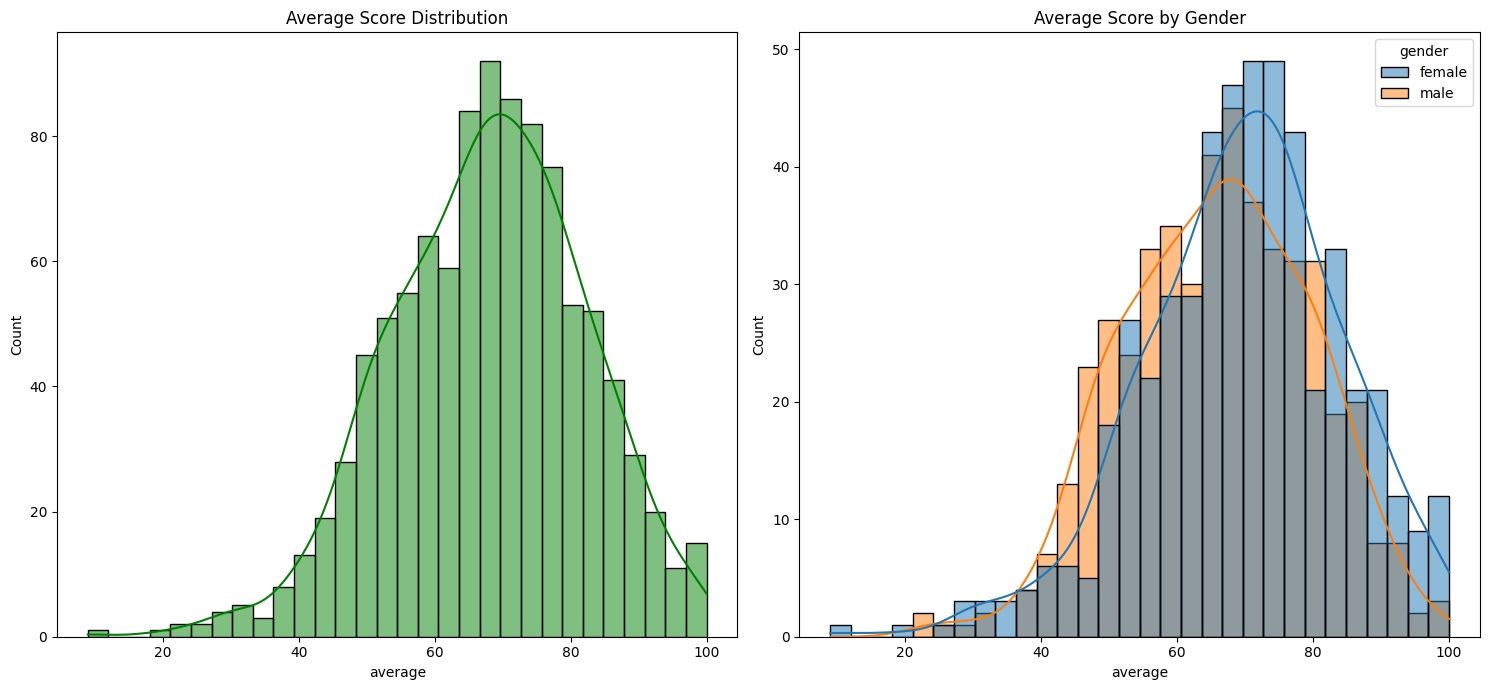

In [39]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Histogram + KDE (no hue)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Average Score Distribution')

# Histogram + KDE with hue
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Score by Gender')

plt.tight_layout()
plt.show()


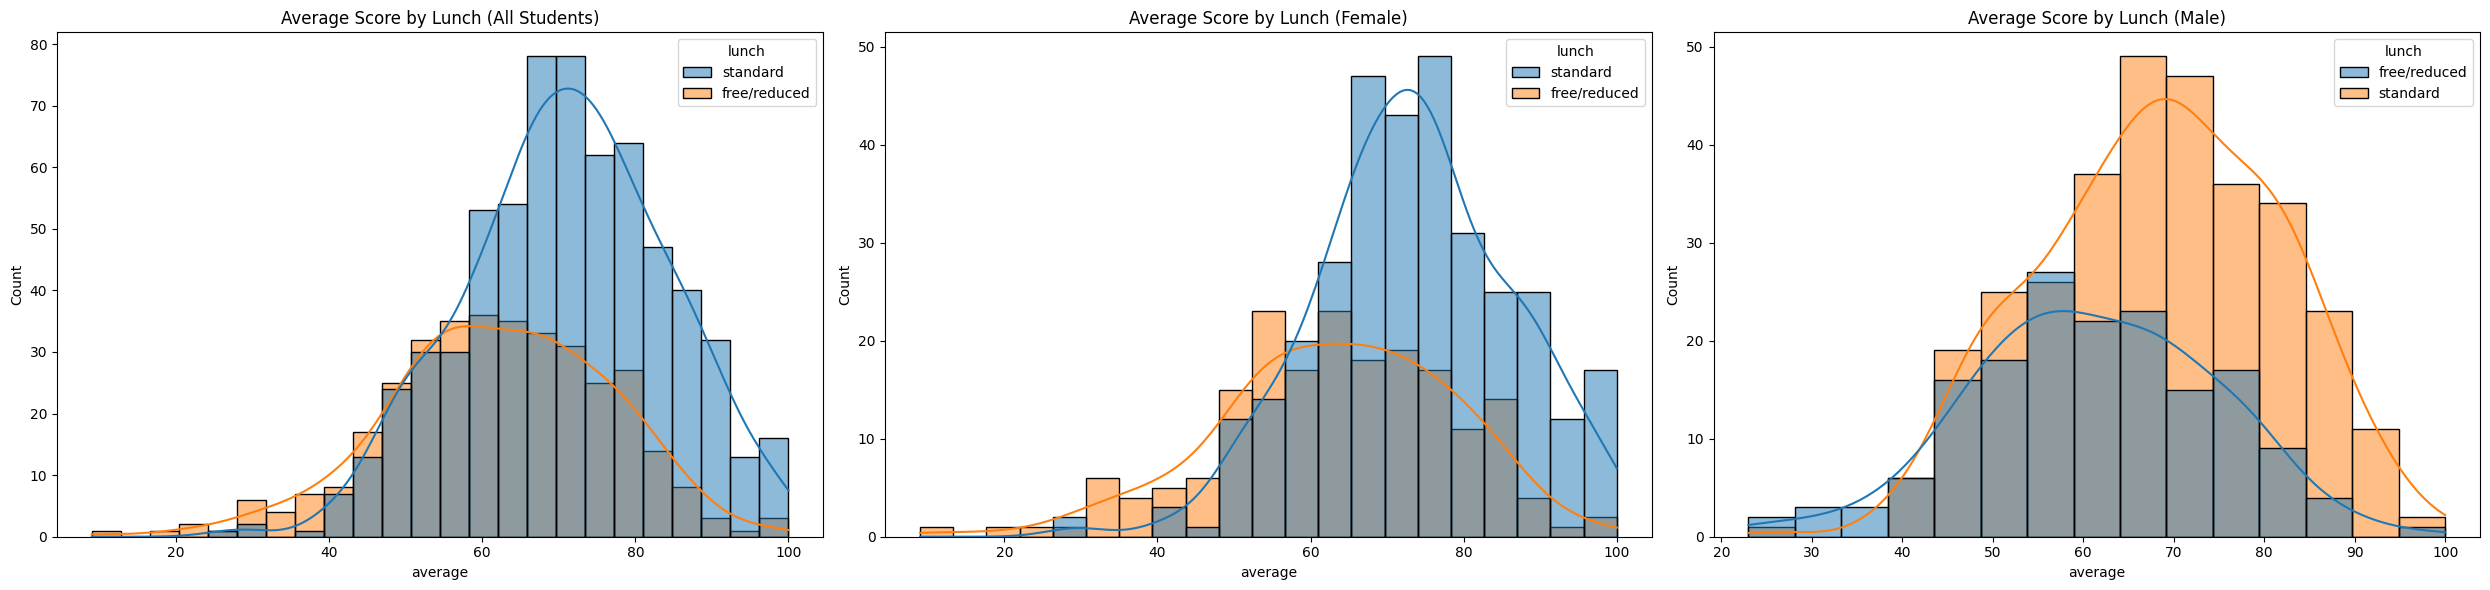

In [41]:
# Create 3 subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot 1: Overall average distribution by lunch
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('Average Score by Lunch (All Students)')

# Plot 2: Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Average Score by Lunch (Female)')

# Plot 3: Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Average Score by Lunch (Male)')

plt.tight_layout()
plt.show()
